In [1]:
import importlib
import seaborn as sns
import pandas as pd

import mysklearn.myutils
importlib.reload(mysklearn.myutils)
import mysklearn.myutils as myutils

# uncomment once you paste your mypytable.py into mysklearn package
import mysklearn.mypytable
importlib.reload(mysklearn.mypytable)
from mysklearn.mypytable import MyPyTable

import mysklearn.myclassifiers
importlib.reload(mysklearn.myclassifiers)

import matplotlib.pyplot as plt
import numpy as np
from flask import Flask
app = Flask(__name__)

##### Step0: prepare data

In [2]:
df = pd.read_csv("archive/matches/matches/qualifying_1960-2024.csv")
df.head()

,id_match,home_team,away_team,home_team_code,away_team_code,home_score,away_score,home_penalty,away_penalty,home_score_total,...,stadium_city,stadium_name,stadium_name_media,stadium_name_official,stadium_name_event,stadium_name_sponsor,home_team_key,away_team_key,home_team_rank,away_team_rank
0,3999,USSR,Hungary,URS,HUN,3.0,1.0,NaN,NaN,3.0,...,Moscow,Luzhniki Stadium,Luzhniki Stadium,Luzhniki Stadium,Luzhniki Stadium,Luzhniki Stadium,1960USSR,1960Hungary,NaN,4.0
1,4000,France,Greece,FRA,GRE,7.0,1.0,NaN,NaN,7.0,...,Paris,Parc des Princes,Parc des Princes,Parc des Princes,Parc des Princes,Parc des Princes,1960France,1960Greece,13.0,75.0
2,4001,Romania,Türki̇ye,ROU,TUR,3.0,0.0,NaN,NaN,3.0,...,Bucharest,23 August,23 August,23 August,23 August,23 August,1960Romania,1960Türki̇ye,41.0,NaN
3,4002,Greece,France,GRE,FRA,1.0,1.0,NaN,NaN,1.0,...,Athens,Olympic Athletic Center of Athens,"OACA ""Spyros Louis""",Olympic Athletic Center of Athens,"Olympic Athletic Center of Athens ""Spyros Louis""","Olympic Athletic Center of Athens ""Spyros Louis""",1960Greece,1960France,75.0,13.0
4,3997,Republic of Ireland,Czechoslovakia,IRL,TCH,2.0,0.0,NaN,NaN,2.0,...,Dublin,Dalymount Park,Dalymount Park,Dalymount Park,Dalymount Park,Dalymount Park,1960Republic of Ireland,1960Czechoslovakia,NaN,8.0


##### Step1: attribute property

In [3]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Setting the aesthetic style of the plots
# sns.set(style="whitegrid")

# # Histograms for scores
# plt.figure(figsize=(12, 6))
# plt.subplot(1, 2, 1)
# sns.histplot(df['home_score'], bins=10, kde=True, color='blue', label='Home Score')
# plt.title('Distribution of Home Scores')
# plt.legend()

# plt.subplot(1, 2, 2)
# sns.histplot(df['away_score'], bins=10, kde=True, color='red', label='Away Score')
# plt.title('Distribution of Away Scores')
# plt.legend()

# plt.show()

# # Boxplot for match attendance
# plt.figure(figsize=(8, 5))
# sns.boxplot(data=df, x='match_attendance')
# plt.title('Distribution of Match Attendance')
# plt.show()

# # Correlation matrix
# # corr = df.select_dtypes(include=[np.numbr]).corr()
# plt.figure(figsize=(10, 8))
# sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
# plt.title('Correlation Matrix')
# plt.show()


In [4]:
# plt.figure(figsize=(14, 7))

# # Boxplots for home and away scores and penalties
# plt.subplot(1, 2, 1)
# sns.boxplot(data=df[['home_score', 'away_score', 'home_penalty', 'away_penalty']].dropna(), palette="Set2")
# plt.title('Boxplots for Scores and Penalties')

# # Pie chart for winners
# plt.subplot(1, 2, 2)
# winner_counts = df['winner'].value_counts()
# plt.pie(winner_counts, labels=winner_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set3"))
# plt.title('Distribution of Match Winners')

# plt.show()


In [5]:
# # Fill missing values for penalties
# df['home_penalty'].fillna(0, inplace=True)
# df['away_penalty'].fillna(0, inplace=True)

# # Compute the total goals per match from home and away scores
# df['goals'] = df['home_score'] + df['away_score']

# # Determine matches where penalties were taken
# penalty_mask = (df['home_penalty'] > 0) | (df['away_penalty'] > 0)

# # Plotting the data
# fig, ax = plt.subplots(figsize=(14, 7))

# # Goals per match
# ax.bar(df.index, df['goals'], color='skyblue', label='Total Goals')

# # Highlighting matches with penalties
# ax.bar(df.index[penalty_mask], df['goals'][penalty_mask], color='lightcoral', label='Matches with Penalties')

# # Labeling the axes and setting the title
# ax.set_xlabel('Match Index')
# ax.set_ylabel('Goals')
# ax.set_title('Goals Scored Per Match and Highlighting Penalty Matches')

# # Adding a legend
# ax.legend()

# # Display the plot
# plt.show()

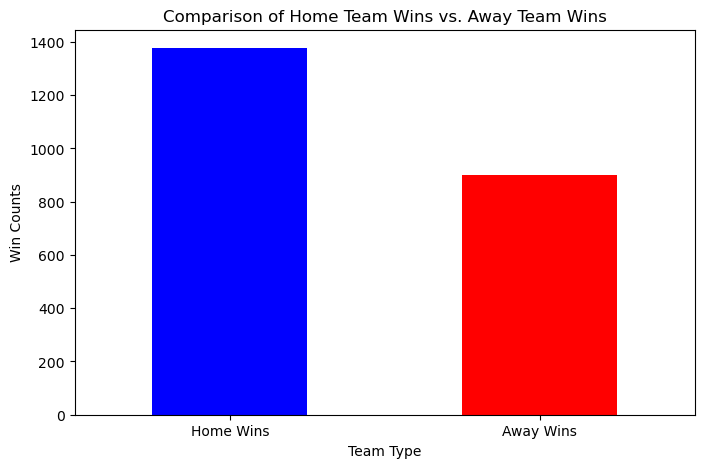

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming combined_data is already loaded with home_score and away_score columns
# Calculate home wins and away wins
df['home_win'] = (df['home_score'] > df['away_score']).astype(int)
df['away_win'] = (df['home_score'] < df['away_score']).astype(int)

# Aggregate the counts
win_counts = df[['home_win', 'away_win']].sum()

# Plotting the data
plt.figure(figsize=(8, 5))
win_counts.plot(kind='bar', color=['blue', 'red'])
plt.title('Comparison of Home Team Wins vs. Away Team Wins')
plt.xlabel('Team Type')
plt.ylabel('Win Counts')
plt.xticks(ticks=[0, 1], labels=['Home Wins', 'Away Wins'], rotation=0)  # Rotate labels for better readability
plt.show()


##2 Classifier implementation

In [7]:
from tabulate import tabulate
import mysklearn.mypytable
import numpy as np
from mysklearn.myclassifiers import *
from mysklearn import myevaluation
df = pd.read_csv("archive/matches/matches/qualifying_1960-2024.csv")

# # Fill any NaN values
# df.fillna(0, inplace=True)

# # Define the target variable (1 if home team wins, 0 if away team wins or draw)
# df['winner'] = (df['home_score'] > df['away_score']).astype(int)

# # Select features (in this simple model, we use only the scores)
# features = df[['home_score', 'away_score']]

# # Split the dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(features, df['winner'], test_size=0.2, random_state=42)
# # Normalize the feature data
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# # Initialize and train the KNN classifier
# knn = KNeighborsClassifier(n_neighbors=5)
# knn.fit(X_train_scaled, y_train)

# # Predict and evaluate the model
# predictions = knn.predict(X_test_scaled)
# accuracy = accuracy_score(y_test, predictions)

# print(f'Model accuracy: {accuracy:.2f}')

# Load your dataset and prepare features and labels
# home_rank_col = df.get_column("home_team_rank")
# away_rank_col = df.get_column("away_team_rank")
# win_col = df.get_column("Winner")
# X = [[c, d] for c, d in (home_rank_col, away_rank_col)]
# y = np.array(win_col)
X = df[['home_team_rank', 'away_team_rank']].values  # Example features
y = (df['home_team_rank'] > df['away_team_rank']).astype(int)  # 1 if home wins, 0 otherwise

# Replace direct boolean values with 'H' for home wins and 'A' for away wins/draws
y = np.where(y == 1, 'H', 'A')

# Metrics
acc, err, f1, cm, recall, precision = [], [], [], [], [], []

# Set up cross-validation
kf = myevaluation.stratified_kfold_split(X, y, n_splits=10, random_state=None, shuffle=False)

# KNN classification and evaluation
for train_inds, test_inds in kf:
    X_train, X_test = X[train_inds], X[test_inds]
    y_train, y_test = y[train_inds], y[test_inds]

    myknn = MyKNeighborsClassifier(10)
    myknn.fit(X_train, list(y_train))
    y_pred = myknn.predict(X_test)

    # Compute metrics
    recall.append(myevaluation.binary_recall_score(y_test, y_pred, labels=['A', 'H'], pos_label='A'))
    precision.append(myevaluation.binary_precision_score(y_test, y_pred, labels=['A', 'H'], pos_label='A'))
    f1.append(myevaluation.binary_f1_score(y_test, y_pred, labels=['A', 'H'], pos_label='A'))
    acc.append(myevaluation.accuracy_score(y_test, y_pred))
    cm.append(np.array(myevaluation.confusion_matrix(y_test, y_pred, labels=['A', 'H'])))

# Aggregate results
acc_total = np.mean(acc)
precision_total, recall_total, f1_total = np.mean(precision), np.mean(recall), np.mean(f1)
cm_total = np.sum(cm, axis=0)

# Output results
print("#####-------KNN---------#######")
print(f"Average accuracy: {acc_total:.2f}, Error: {1 - acc_total:.2f}")
print(f"Average precision: {precision_total:.2f}, Recall: {recall_total:.2f}")
print(f"Average F1 score: {f1_total:.2f}")
print("Confusion matrix:")
print(tabulate(cm_total, headers=["A", "H"], tablefmt="grid", showindex=["A", "H"]))

#####-------KNN---------#######
Average accuracy: 0.62, Error: 0.38
Average precision: 0.62, Recall: 0.99
Average F1 score: 0.76
Confusion matrix:
+----+------+-----+
|    |    A |   H |
+====+======+=====+
| A  | 1733 |   9 |
+----+------+-----+
| H  | 1083 |  20 |
+----+------+-----+


In [8]:
#Naive Bayes
acc,err, f1, cm, recall, precision = [], [],[],[],[],[]
# For Naive Bayes
for train_inds, test_inds in kf:
    X_train = [X[i] for i in train_inds]
    X_test = [X[i] for i in test_inds]
    y_train = y[train_inds]
    y_test = y[test_inds]
    mynb = MyNaiveBayesClassifier()
    mynb.fit(X_train, list(y_train))
    y_pred = mynb.predict(X_test)

    # compute metric
    recall.append(myevaluation.binary_recall_score(y_test, y_pred, labels=['A', 'H'], pos_label='A'))
    precision.append(myevaluation.binary_precision_score(y_test, y_pred, labels=['A', 'H'], pos_label='A'))
    f1.append(myevaluation.binary_f1_score(y_test, y_pred, labels=['A', 'H'], pos_label='A'))
    acc.append(myevaluation.accuracy_score(y_test, y_pred))
    cm.append(np.array(myevaluation.confusion_matrix(y_test, y_pred, labels=['A', 'H'])))

acc_total = np.average(acc)
err_total = 1 - acc_total
precision_total = np.average(precision)
recall_total = np.average(recall)
f1_total = np.average(f1)
cm_total = cm[0]
for i in range(1, len(cm)):
    cm_total += cm[i]
print(f"#####-------Naive Bayes---------#######")
print(f"average acc: {acc_total}, err: {1 - acc_total}")
print(f"average precision: {precision_total}, recall: {recall_total}")
print(f"average fold f1: {f1_total}")
print(f"confusion matrix:")
cm_list = [[i for i in row] for row in cm_total]
labels = ['A',"H"]
cm_with_labels = [[labels[i]] + row for i, row in enumerate(cm_list)]
print(tabulate( cm_with_labels, headers=[" ", "A","H"], tablefmt="grid"))


#####-------Naive Bayes---------#######
average acc: 0.8495655678643077, err: 0.1504344321356923
average precision: 0.924912577071278, recall: 0.821471264367816
average fold f1: 0.8699177745344704
confusion matrix:
+-----+------+-----+
|     |    A |   H |
+=====+======+=====+
| A   | 1431 | 311 |
+-----+------+-----+
| H   |  117 | 986 |
+-----+------+-----+


In [9]:
#Random Forest
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Random forest
acc,err, f1, cm, recall, precision = [], [],[],[],[],[]
# For random forest
for train_inds, test_inds in kf:
   X_train = [X[i] for i in train_inds]
   X_test = [X[i] for i in test_inds]
   y_train = y[train_inds]
   y_test = y[test_inds]
   myrf = MyRandomForestClassifier(n_trees=10)
   myrf.fit(X_train, y_train)
   y_pred = myrf.predict(X_test)

   # compute metric
   recall.append(myevaluation.binary_recall_score(y_test, y_pred, labels=['A', 'H'], pos_label='A'))
   precision.append(myevaluation.binary_precision_score(y_test, y_pred, labels=['A', 'H'], pos_label='A'))
   f1.append(myevaluation.binary_f1_score(y_test, y_pred, labels=['A', 'H'], pos_label='A'))
   acc.append(myevaluation.accuracy_score(y_test, y_pred))
   # cm.append(np.array(myevaluation.confusion_matrix(y_test, y_pred, labels=['A', 'H'])))

acc_total = np.average(acc)
err_total = 1 - acc_total
precision_total = np.average(precision)
recall_total = np.average(recall)
f1_total = np.average(f1)
# cm_total = cm[0]
for i in range(1, len(cm)):
   cm_total += cm[i]
print(f"#####-------Random Forest---------#######")
print(f"average acc: {acc_total}, err: {1 - acc_total}")
print(f"average precision: {precision_total}, recall: {recall_total}")
print(f"average fold f1: {f1_total}")
print(f"confusion matrix:")
cm_list = [[i for i in row] for row in cm_total]
labels = ['A',"H"]
cm_with_labels = [[labels[i]] + row for i, row in enumerate(cm_list)]
print(tabulate( cm_with_labels, headers=[" ", "A","H"], tablefmt="grid"))

#####-------Random Forest---------#######
average acc: 0.7694181997888447, err: 0.23058180021115526
average precision: 0.9901630692693635, recall: 0.6297339901477833
average fold f1: 0.769519226618654
confusion matrix:
+-----+------+-----+
|     |    A |   H |
+=====+======+=====+
| A   | 1431 | 311 |
+-----+------+-----+
| H   |  117 | 986 |
+-----+------+-----+
